<a href="https://colab.research.google.com/github/tiaherdi/Traffic-Sign-5/blob/Farida-Nur-Hayati/Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import os
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# IMPORT LIBRARY
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime

# baca file dari drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#ubah pathnya sesuai lokasi dataset 
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/covid_impact_on_airport_traffic.csv',index_col="Date",parse_dates=True)
dataset.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Unnamed: 10,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,Daily,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-13,Daily,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,Daily,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,Daily,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,Daily,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = dataset.sort_values(by="Date")
data.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Unnamed: 10,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,Daily,1,Dallas/Fort Worth International,65,POINT(-97.0394983968728 32.8940590356408),Grapevine,Texas,US-TX,United States of America (the),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,Daily,1,Edmonton International,61,POINT(-113.576260685047 53.308783097969),Leduc County,Alberta,CA-AB,Canada,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,Daily,1,Winnipeg International,94,POINT(-97.2190621861971 49.9024712565967),Winnipeg,Manitoba,CA-MB,Canada,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,Daily,1,McCarran International,40,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,Daily,1,John F. Kennedy International,49,POINT(-73.7784465295804 40.6460265940045),New York,New York,US-NY,United States of America (the),NaN,...,-73.7792658805847 40.6340660730435,"-73.7883961200714 40.6226989508664))""""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape
grouping = data.groupby("Country").count()
grouping

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Unnamed: 10,Unnamed: 11,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
Country,,,,,,,,,,,,,,,,,,,,,
Australia,257,257,257,257,257,257,257,257,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,2311,2311,2311,2311,2311,2311,2311,2311,0,0,...,514,514,514,514,514,514,0,0,0,0
Chile,238,238,238,238,238,238,238,238,0,0,...,0,0,0,0,0,0,0,0,0,0
United States of America (the),4441,4441,4441,4441,4441,4441,4441,4441,0,0,...,785,785,523,523,523,523,523,523,261,261


In [8]:
data = data.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Centroid', 'State', 'AirportName', 'City'], 
                         axis=1)
data.head()

,PercentOfBaseline,Country,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,65,United States of America (the),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,61,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,94,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,40,United States of America (the),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,49,United States of America (the),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-73.7792658805847 40.6340660730435,"-73.7883961200714 40.6226989508664))""""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


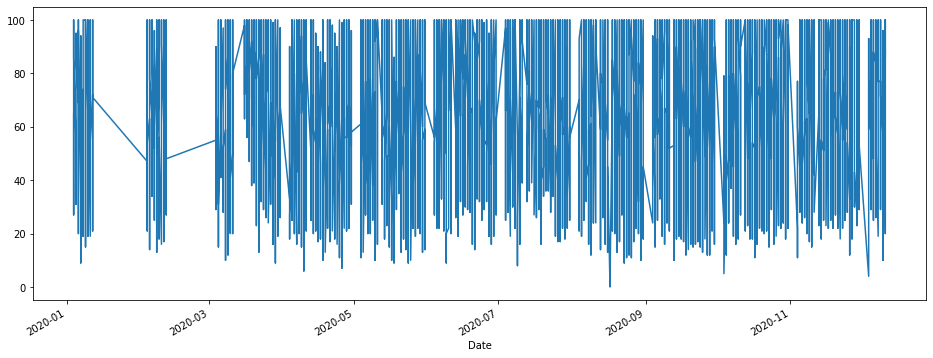

In [9]:
data.describe()
dataset['PercentOfBaseline'].plot(figsize=(16,6))

In [10]:
# membuat dataframe per negara
data_per_negara = data.groupby('Country')
australia = data_per_negara.get_group('Australia')
canada = data_per_negara.get_group('Canada')
chile = data_per_negara.get_group('Chile')
us  = data_per_negara.get_group('United States of America (the)')

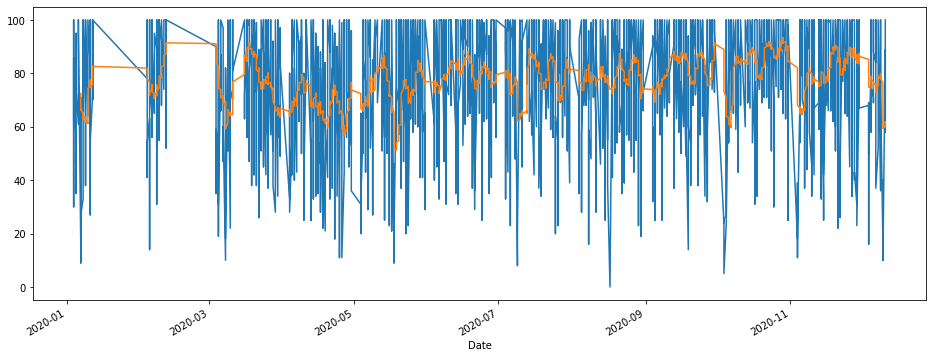

In [11]:
canada['PercentOfBaseline'].plot(figsize=(16,6))
canada.rolling(window=30).mean()['PercentOfBaseline'].plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')